In [94]:
%pip install openpyxl
%pip install numpy
%pip install hello

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement hello (from versions: none)
ERROR: No matching distribution found for hello


In [95]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
auto=pd.read_excel(r"BDA_Pre_Screening_Auto.xlsx",engine='openpyxl')
auto.drop(index=[0,1,2,3],inplace=True)

In [96]:
auto.reset_index(drop=True,inplace=True)
auto.columns


Index(['Id', 'Title', 'Brand', 'Product', 'Category', 'Network',
       'Network Type', 'Show', 'Date', 'Time', 'Pod Position', 'Dayparts',
       'Co-Op Brand', 'Co-Op Product', 'Duration', 'EQ Units', 'Spend ($)',
       'Broadcast Year', 'Broadcast Month', 'Broadcast Week', 'Day Of Week',
       'Hour Of Day', 'TimeZone'],
      dtype='object')

In [97]:
auto.columns
auto['Co-Op Brand'].nunique()
auto['Co-Op Product'].nunique()
auto.drop(columns={'Co-Op Brand','Co-Op Product'},inplace=True)


In [98]:
duplicated=auto['Id'].duplicated()
duplicated.unique()
auto['Date']=pd.to_datetime(auto['Date'])
auto['Quarter']=auto['Date'].dt.quarter

In [99]:
print(auto['Brand'].head())
pd.set_option('display.float_format', '{:,.2f}'.format)

0    Toyota
1    Toyota
2    Toyota
3      Ford
4     Lexus
Name: Brand, dtype: object


In [100]:
# Ensure 'Brand' column is correctly formatted and exists
auto['Brand'] = auto['Brand'].astype(str)

# Create pivot table
airings = auto.pivot_table(index='Brand', columns='Quarter', values='Id', aggfunc='count').reset_index()

# Rename columns
airings.columns = ['Brand'] + [f'Q{i}' for i in range(1, auto['Quarter'].nunique() + 1)]

# Add total row
airings.loc[len(airings)] = {'Brand': 'Total', **{f'Q{i}': airings[f'Q{i}'].sum() for i in range(1, auto['Quarter'].nunique() + 1)}}

# Calculate percent change
for i in range(1, auto['Quarter'].nunique()):
    airings[f'percent_change_from_Q{i}'] = ((airings[f'Q{i+1}'] - airings[f'Q{i}']) / airings[f'Q{i}']) * 100

# Reorder columns
airings = airings[['Brand', 'Q1', 'Q2', 'percent_change_from_Q1', 'Q3', 'percent_change_from_Q2', 'Q4', 'percent_change_from_Q3']]

# Calculate percent share duration
for i in range(1, auto['Quarter'].nunique() + 1):
    airings[f'percent_share_duration_Q{i}'] = airings[f'Q{i}'] * 100 / airings.loc[len(airings) - 1, f'Q{i}']

# Reorder columns again
airings = airings[['Brand', 'Q1', f'percent_share_duration_Q1', 'Q2', f'percent_share_duration_Q2', 'percent_change_from_Q1', 'Q3', f'percent_share_duration_Q3', 'percent_change_from_Q2', 'Q4', f'percent_share_duration_Q4', 'percent_change_from_Q3']]

airings

,Brand,Q1,percent_share_duration_Q1,Q2,percent_share_duration_Q2,percent_change_from_Q1,Q3,percent_share_duration_Q3,percent_change_from_Q2,Q4,percent_share_duration_Q4,percent_change_from_Q3
0,BMW,292,0.52,1818,3.82,522.60,819,1.72,-54.95,2706,5.52,230.40
1,Chevrolet,8154,14.64,5677,11.94,-30.38,7844,16.43,38.17,5588,11.40,-28.76
2,Ford,10546,18.93,8906,18.72,-15.55,6603,13.83,-25.86,4767,9.72,-27.81
3,Honda,7590,13.62,3863,8.12,-49.10,568,1.19,-85.30,5831,11.90,926.58
4,Lexus,20813,37.36,19164,40.29,-7.92,17845,37.38,-6.88,21413,43.68,19.99
5,Toyota,8315,14.93,8137,17.11,-2.14,14061,29.45,72.80,8715,17.78,-38.02
6,Total,55710,100.00,47565,100.00,-14.62,47740,100.00,0.37,49020,100.00,2.68


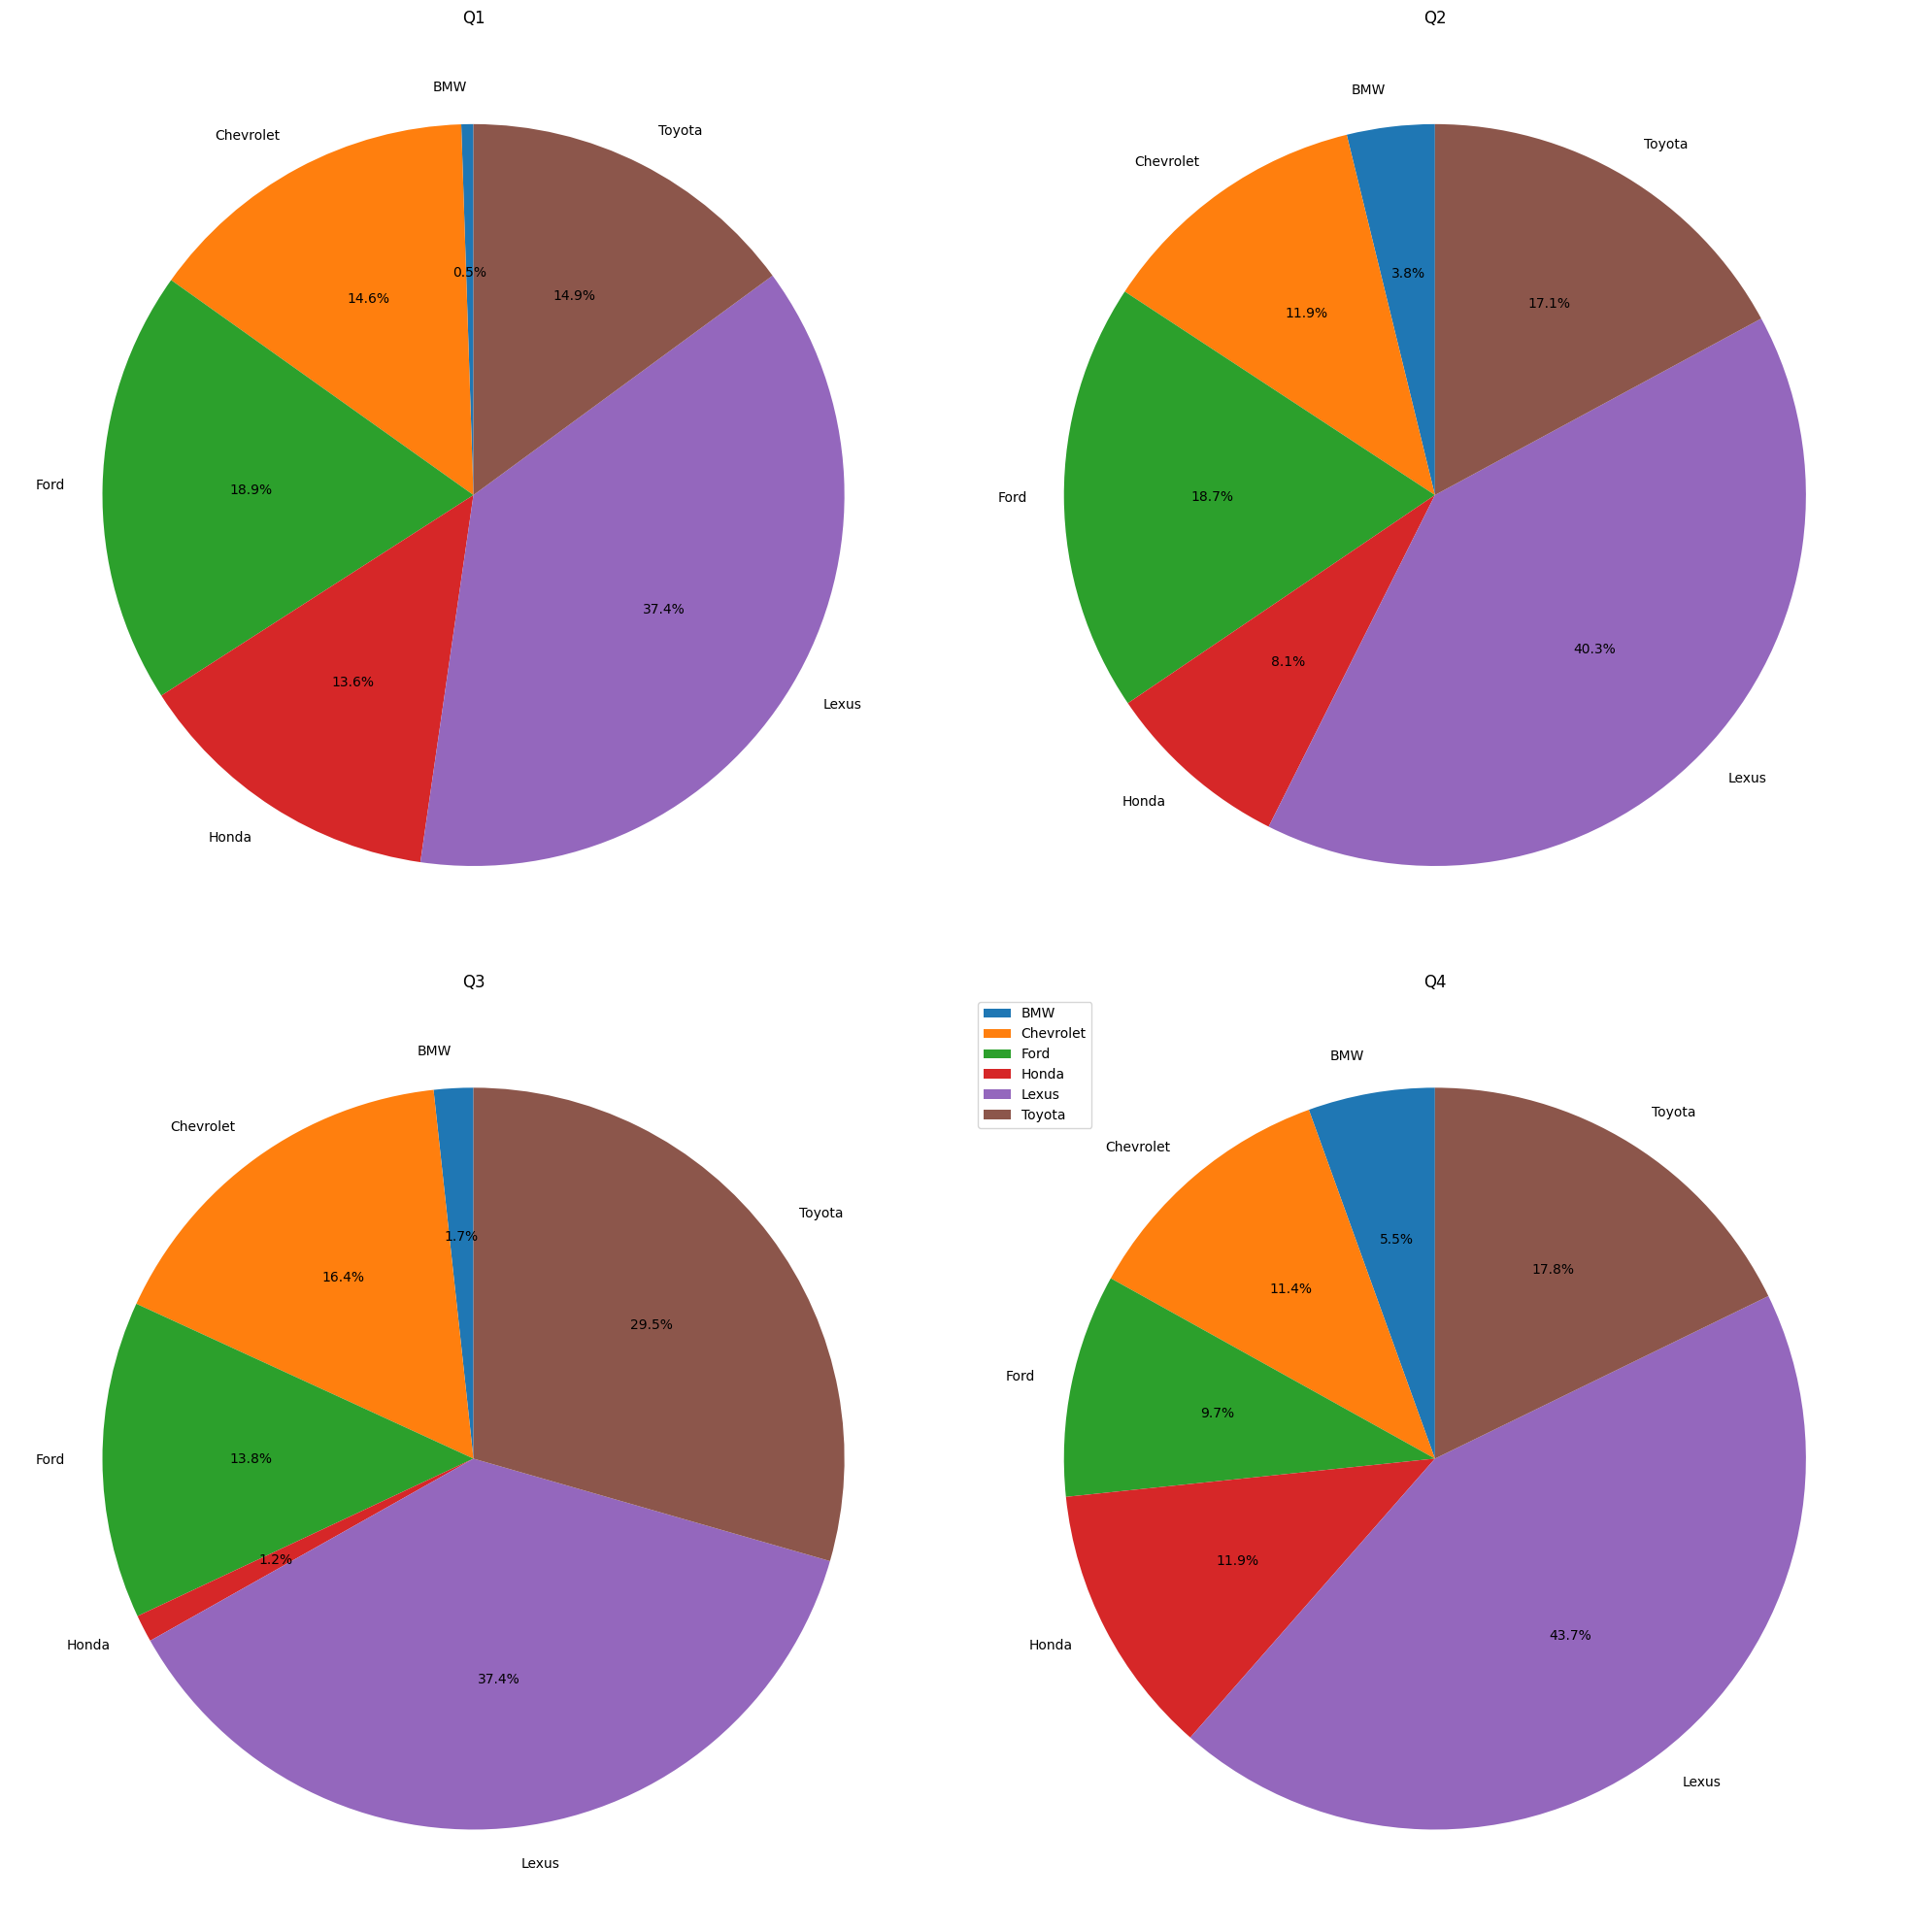

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
m, n = 0, 0
for i in range(1, auto['Quarter'].nunique() + 1):
    if i == 1:
        m, n = 0, 0
    elif i == 2:
        m, n = 0, 1
    elif i == 3:
        m, n = 1, 0
    elif i == 4:
        m, n = 1, 1
    axes[m, n].pie(airings[~(airings['Brand'] == 'Total')][f'Q{i}'], 
                   labels=airings[~(airings['Brand'] == 'Total')]['Brand'], 
                   autopct='%1.1f%%', startangle=90, shadow=False)
    axes[m, n].set_title(f'Q{i}')
plt.tight_layout()
# plt.legend(loc='upper left',bbox_to_anchor=(0, 1))
plt.show()

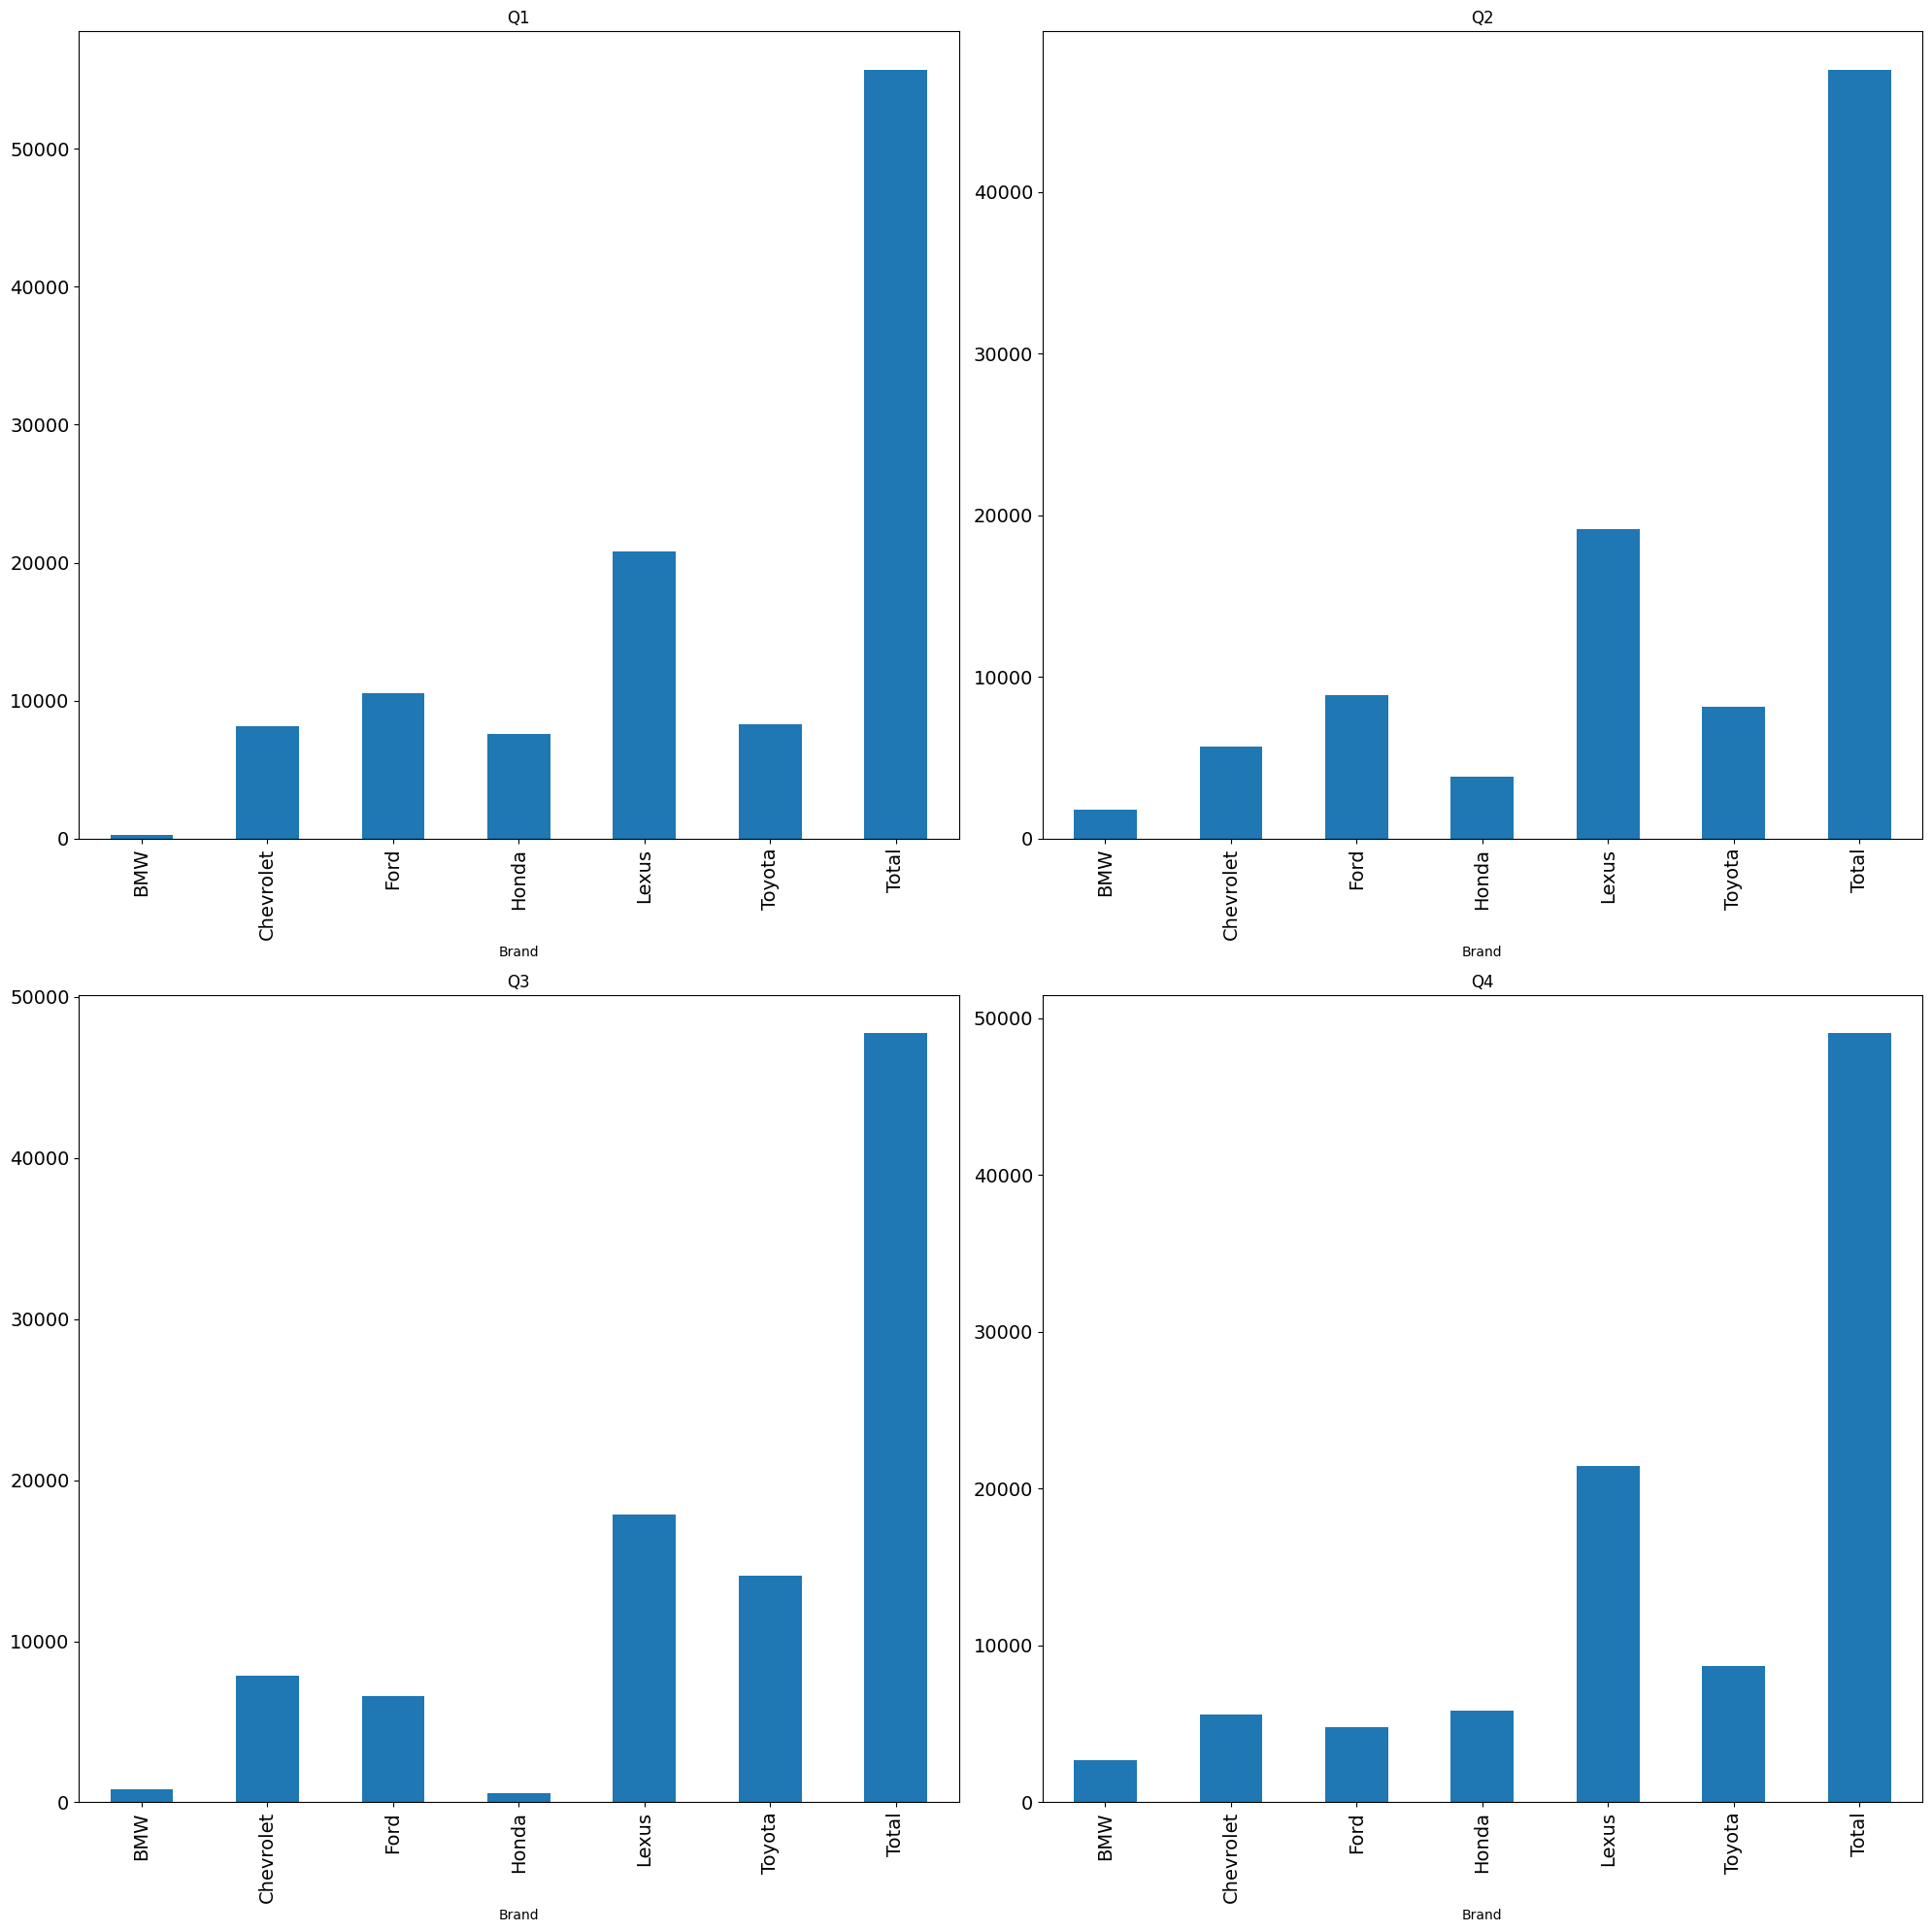

In [ ]:
plt.figure(figsize=(20, 10))
for brand in airings['Brand']:
    if brand != 'Total':
        plt.plot(airings.columns[1:5], airings[airings['Brand'] == brand].values[0][1:5], label=brand)


In [ ]:

auto.pivot_table(index='Brand',columns='Quarter',values='Spend ($)',aggfunc='sum')
auto.groupby(['Brand','Quarter'])['Duration'].pct_change().reset_index(name='Change in Duration of Ads')

,index,Change in Duration of Ads
0,0,NaN
1,1,-0.50
2,2,1.00
3,3,NaN
4,4,NaN
...,...,...
200030,200030,-0.50
200031,200031,0.00
200032,200032,0.00
200033,200033,0.00


In [8]:

auto.pivot_table(index='Brand',columns='Quarter',values='Spend ($)',aggfunc='sum')
auto.groupby(['Brand','Quarter'])['Duration'].pct_change().reset_index(name='Change in Duration of Ads')

,index,Change in Duration of Ads
0,0,NaN
1,1,-0.5
2,2,1.0
3,3,NaN
4,4,NaN
...,...,...
200030,200030,-0.5
200031,200031,0.0
200032,200032,0.0
200033,200033,0.0


In [23]:
name=

,Id,Title,Brand,Product,Category,Network,Network Type,Show,Date,Time,...,Duration,EQ Units,Spend ($),Broadcast Year,Broadcast Month,Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Quarter
0,5294847,Toyota Sienna,Toyota,Toyota Sienna,Vehicles & Parts,ESPN2,cable,College Basketball,2021-01-07,8:12:45 PM,...,30,1,6229,2021,JAN,2,4,20,US/Eastern,1
1,5386720,Toyota Sienna,Toyota,Toyota Sienna,Vehicles & Parts,MTV - Music Television,cable,Ridiculousness,2021-01-16,7:17:43 AM,...,15,0.5,575,2021,JAN,3,6,7,US/Eastern,1
2,5294496,Toyota Sienna,Toyota,Toyota Sienna,Vehicles & Parts,Comedy Central,cable,South Park,2021-01-13,6:52:57 PM,...,30,1,1496,2021,JAN,3,3,18,US/Eastern,1
3,5205771,FORD,Ford,FORD,Vehicles & Parts,National Geographic,cable,Port Protection Alaska,2021-01-09,9:39:21 AM,...,30,1,605,2021,JAN,2,6,9,US/Eastern,1
4,5837984,Lexus Branding,Lexus,Lexus Branding,Vehicles & Parts,MLB Network,cable,MLB Tonight,2021-01-06,6:35:19 PM,...,30,1,345,2021,JAN,2,3,18,US/Eastern,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200030,5913078,Lexus Branding,Lexus,Lexus Branding,Vehicles & Parts,MLB Network,cable,MLB Network Countdown,2021-12-22,3:15:30 AM,...,15,0.5,14,2021,DEC,52,3,3,US/Eastern,4
200031,5913078,Lexus Branding,Lexus,Lexus Branding,Vehicles & Parts,MLB Network,cable,Play Ball,2021-12-24,3:38:59 AM,...,15,0.5,14,2021,DEC,52,5,3,US/Eastern,4
200032,5913078,Lexus Branding,Lexus,Lexus Branding,Vehicles & Parts,MLB Network,cable,MLB Network Countdown,2021-12-26,8:30:14 AM,...,15,0.5,26,2021,DEC,52,7,8,US/Eastern,4
200033,5865349,FORD,Ford,FORD,Vehicles & Parts,ESPN Deportes,cable,Baloncesto NBA,2021-12-25,11:20:47 PM,...,30,1,223,2021,DEC,52,6,23,US/Eastern,4
